NOT FOUND
454897
#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 8
Symbol Size: 67108864
# Result information
Amount of results: 1000
Average: 499.502084

#### Test Result ###
# General Infomation
Threads: 16
Generation Size: 16
Symbol Size: 33554432
# Result information
Amount of results: 1000
Average: 997.871282

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 32
Symbol Size: 16777216
# Result information
Amount of results: 1000
Average: 1880.422057

#### Test Result ###
# General Infomation
Threads: 64
Generation Size: 64
Symbol Size: 8388608
# Result information
Amount of results: 1000
Average: 3591.800507

#### Test Result ###
# General Infomation
Threads: 256
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 13968.921486



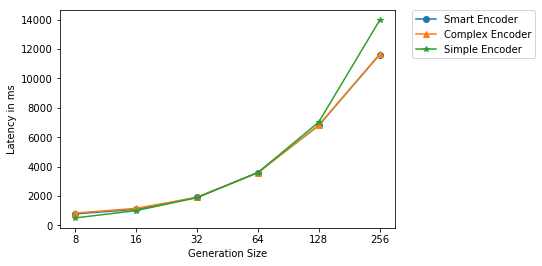

In [2]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

class Result:
    
    threads = -1
    symbol_size = -1
    symbols = -1
    def __init__(self, arr):
        data = [entry.split(',') for entry in arr]
        self.results = list()
        self.threads = long(data[0][3])
        self.symbols = long(data[0][4])
        self.symbol_size = long(data[0][5])
        self.__get_results(arr)
        
        
    def __get_results(self, arr):
        for entry in arr:
            self.results.append(
            {'start_time': long((entry.split(','))[0]),
             'end_time': long((entry.split(','))[1]),
             'diff': long(entry.split(',')[2])
            })
            
            
            
    def average(self,unit=None):
        result = 0
        for entry in self.results:
            result = result + entry.get('diff', 0)
            # print result
        result = float(result) / len(self.results)
        if unit is None:
            return result
        elif unit == 'ms':
            return result / 1000
        
    def maximum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]

        if unit == None:
            return max(values)
        elif unit == 'ms':
            return float(max(values)) * 0.001
    
    def minimum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]
        if unit == None:
            return min(values)
        elif unit == 'ms':
            return float(min(values)) * 0.001
        
    def diff_look_up(self, diff):
        for entry in self.results:
            if entry.get('diff') == diff:
                return entry
        return None
        
    def result_report(self, unit=None):
        text = '#### Test Result ###'
        text = text + '\n' + '# General Infomation'
        text = text + '\n' + 'Threads: {threads}'.format(threads=self.threads)
        text = text + '\n' + 'Generation Size: {symbols}'.format(symbols=self.symbols)
        text = text + '\n' + 'Symbol Size: {symbol_size}'.format(symbol_size=self.symbol_size)
        text = text + '\n' + '# Result information'
        text = text + '\n' + 'Amount of results: {res}'.format(res=len(self.results))
      #  text = text + '\n' + 'Min: {minn}'.format(minn=self.minimum(unit))
      #  text = text + '\n' + 'Max: {maxz}'.format(maxz=self.maximum(unit))
        text = text + '\n' + 'Average: {avg}'.format(avg=self.average(unit))
        return text

def read_file(file_name):
    with open(file_name) as file:
        content = file.readlines()
    content = [line.strip() for line in content]
    return content

def plot_results(smart, complex_enc, simple, file_name):
    
    smart_avg = [res.average(unit='ms') for res in smart]
    complex_avg = [res.average(unit='ms') for res in complex_enc]
    simple_avg = [res.average(unit='ms') for res in simple]
    
    generations = [res.symbols for res in smart]
    
    my_xticks = ['8','16','32','64','128','256']
    pd.DataFrame
    fig = plt.figure()

    plt.xticks(range(3, 9), my_xticks)
    plt.plot(range(3, 9), smart_avg, marker='o', label='Smart Encoder')
    plt.plot(range(3, 9), complex_avg, marker='^', label='Complex Encoder')
    plt.plot(range(3, 9), simple_avg, marker='*', label='Simple Encoder')    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.yscale("log", nonposy='clip')
    plt.ylabel('Latency in ms')
    plt.xlabel('Generation Size')
    fig.savefig('../results/compare/{}'.format(file_name), bbox_inches='tight')
    plt.show()    
    


    
def are_same_data_size(results):
    for entry in results:
        for res in results:
            ds1 = entry.symbols * entry.symbol_size
            ds2 = res.symbols * res.symbol_size
            if not ds1 == ds2:
                return False
    return True
    
res = Result(read_file('../results/smart_encoder/1525563276_smart_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/smart_encoder/1525554075_smart_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/smart_encoder/1525585323_smart_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/smart_encoder/1525575130_smart_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/smart_encoder/1525600352_smart_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/smart_encoder/1525544678_smart_encoder_benchmark_8_256_2097152'))

smart_encoder = [res, res1, res2, res3, res4, res5]

res = Result(read_file('../results/complex_encoder/1525732922_complex_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/complex_encoder/1525707946_complex_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/complex_encoder/1525890723_complex_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/complex_encoder/1525780992_complex_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/complex_encoder/1525905803_complex_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/complex_encoder/1525698436_complex_encoder_benchmark_8_256_2097152'))
        
complex_encoder = [res, res1, res2, res3, res4, res5]

res = Result(read_file('../results/simple_encoder/1525640926_simple_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/simple_encoder/1525632039_simple_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/simple_encoder/1525663136_simple_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/simple_encoder/1525652885_simple_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/simple_encoder/1525678515_simple_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/simple_encoder/1525622657_simple_encoder_benchmark_8_256_2097152'))

simple_encoder = [res, res1, res2, res3, res4, res5]


t = res.diff_look_up(231258)

if t is None:
    print('NOT FOUND')
else: 
    print('l')
    print(t)
    
    
minm = res.results[0].get('diff')
for entry in res.results:
    if entry.get('diff') < minm:
        minm = entry.get('diff')
print(minm)
    

print res.result_report(unit='ms')
print ''

print res1.result_report(unit='ms')
print ''

print res2.result_report(unit='ms')
print ''

print res3.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''



#print(are_same_data_size(results))
plot_results(smart_encoder, complex_encoder, simple_encoder, 'first_encoder_base_comparison.eps')

/Users/larsnielsen/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


NOT FOUND
454897
#### Test Result ###
# General Infomation
Threads: 8
Generation Size: 8
Symbol Size: 67108864
# Result information
Amount of results: 1000
Average: 499.502084

#### Test Result ###
# General Infomation
Threads: 16
Generation Size: 16
Symbol Size: 33554432
# Result information
Amount of results: 1000
Average: 997.871282

#### Test Result ###
# General Infomation
Threads: 32
Generation Size: 32
Symbol Size: 16777216
# Result information
Amount of results: 1000
Average: 1880.422057

#### Test Result ###
# General Infomation
Threads: 64
Generation Size: 64
Symbol Size: 8388608
# Result information
Amount of results: 1000
Average: 3591.800507

#### Test Result ###
# General Infomation
Threads: 256
Generation Size: 256
Symbol Size: 2097152
# Result information
Amount of results: 1000
Average: 13968.921486



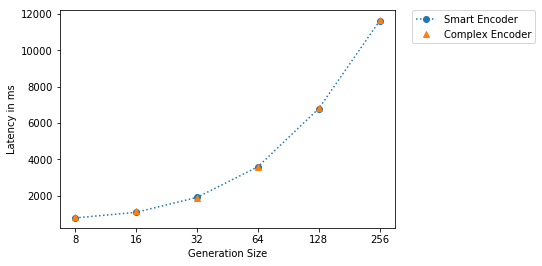

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 

class Result:
    
    threads = -1
    symbol_size = -1
    symbols = -1
    def __init__(self, arr):
        data = [entry.split(',') for entry in arr]
        self.results = list()
        self.threads = long(data[0][3])
        self.symbols = long(data[0][4])
        self.symbol_size = long(data[0][5])
        self.__get_results(arr)
        
        
    def __get_results(self, arr):
        for entry in arr:
            self.results.append(
            {'start_time': long((entry.split(','))[0]),
             'end_time': long((entry.split(','))[1]),
             'diff': long(entry.split(',')[2])
            })
            
            
            
    def average(self,unit=None):
        result = 0
        for entry in self.results:
            result = result + entry.get('diff', 0)
            # print result
        result = float(result) / len(self.results)
        if unit is None:
            return result
        elif unit == 'ms':
            return result / 1000
        
    def maximum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]

        if unit == None:
            return max(values)
        elif unit == 'ms':
            return float(max(values)) * 0.001
    
    def minimum(self, unit=None):
        values = [entry.get('diff') for entry in self.results]
        if unit == None:
            return min(values)
        elif unit == 'ms':
            return float(min(values)) * 0.001
        
    def diff_look_up(self, diff):
        for entry in self.results:
            if entry.get('diff') == diff:
                return entry
        return None
        
    def result_report(self, unit=None):
        text = '#### Test Result ###'
        text = text + '\n' + '# General Infomation'
        text = text + '\n' + 'Threads: {threads}'.format(threads=self.threads)
        text = text + '\n' + 'Generation Size: {symbols}'.format(symbols=self.symbols)
        text = text + '\n' + 'Symbol Size: {symbol_size}'.format(symbol_size=self.symbol_size)
        text = text + '\n' + '# Result information'
        text = text + '\n' + 'Amount of results: {res}'.format(res=len(self.results))
      #  text = text + '\n' + 'Min: {minn}'.format(minn=self.minimum(unit))
      #  text = text + '\n' + 'Max: {maxz}'.format(maxz=self.maximum(unit))
        text = text + '\n' + 'Average: {avg}'.format(avg=self.average(unit))
        return text

def read_file(file_name):
    with open(file_name) as file:
        content = file.readlines()
    content = [line.strip() for line in content]
    return content

def plot_results(smart, complex_enc, simple, file_name):
    
    smart_avg = [res.average(unit='ms') for res in smart]
    complex_avg = [res.average(unit='ms') for res in complex_enc]
    simple_avg = [res.average(unit='ms') for res in simple]
    
    generations = [res.symbols for res in smart]
    
    my_xticks = ['8','16','32','64','128','256']
    pd.DataFrame
    fig = plt.figure()

    plt.xticks(range(3, 9), my_xticks)
    plt.plot(range(3, 9), smart_avg, marker='o', linestyle=":", label='Smart Encoder')
    plt.plot(range(3, 9), complex_avg, marker='^', linestyle="", label='Complex Encoder')
    # plt.plot(range(3, 9), simple_avg, marker='*', label='Simple Encoder')    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.yscale("log", nonposy='clip')
    plt.ylabel('Latency in ms')
    plt.xlabel('Generation Size')
    fig.savefig('../results/compare/{}'.format(file_name), bbox_inches='tight')
    plt.show()    
    


    
def are_same_data_size(results):
    for entry in results:
        for res in results:
            ds1 = entry.symbols * entry.symbol_size
            ds2 = res.symbols * res.symbol_size
            if not ds1 == ds2:
                return False
    return True
    
res = Result(read_file('../results/smart_encoder/1525563276_smart_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/smart_encoder/1525554075_smart_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/smart_encoder/1525585323_smart_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/smart_encoder/1525575130_smart_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/smart_encoder/1525600352_smart_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/smart_encoder/1525544678_smart_encoder_benchmark_8_256_2097152'))

smart_encoder = [res, res1, res2, res3, res4, res5]

res = Result(read_file('../results/complex_encoder/1525732922_complex_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/complex_encoder/1525707946_complex_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/complex_encoder/1525890723_complex_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/complex_encoder/1525780992_complex_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/complex_encoder/1525905803_complex_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/complex_encoder/1525698436_complex_encoder_benchmark_8_256_2097152'))
        
complex_encoder = [res, res1, res2, res3, res4, res5]

res = Result(read_file('../results/simple_encoder/1525640926_simple_encoder_benchmark_8_8_67108864'))
res1 = Result(read_file('../results/simple_encoder/1525632039_simple_encoder_benchmark_8_16_33554432'))
res2 = Result(read_file('../results/simple_encoder/1525663136_simple_encoder_benchmark_8_32_16777216'))
res3 = Result(read_file('../results/simple_encoder/1525652885_simple_encoder_benchmark_8_64_8388608'))
res4 = Result(read_file('../results/simple_encoder/1525678515_simple_encoder_benchmark_8_128_4194304'))
res5 = Result(read_file('../results/simple_encoder/1525622657_simple_encoder_benchmark_8_256_2097152'))

simple_encoder = [res, res1, res2, res3, res4, res5]


t = res.diff_look_up(231258)

if t is None:
    print('NOT FOUND')
else: 
    print('l')
    print(t)
    
    
minm = res.results[0].get('diff')
for entry in res.results:
    if entry.get('diff') < minm:
        minm = entry.get('diff')
print(minm)
    

print res.result_report(unit='ms')
print ''

print res1.result_report(unit='ms')
print ''

print res2.result_report(unit='ms')
print ''

print res3.result_report(unit='ms')
print ''

print res5.result_report(unit='ms')
print ''



#print(are_same_data_size(results))
plot_results(smart_encoder, complex_encoder, simple_encoder, 'first_complex_smart_encoder_base_comparison.eps')